In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('E:/Abdul Rauf/Depression/Depression Student Dataset.csv')

In [3]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [5]:
df.duplicated().sum()

0

In [6]:
cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

def map(x):
  if x == 'Yes':
    return 1
  else:
    return 0

for i in cols: 
  df[i] = df[i].apply(lambda x:1 if x == 'Yes' else 0)

In [7]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 0 if x == '7-8 hours' else 1 if x == 'Less than 5 hours' else 2 if x == '5-6 hours' else 3)
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: 0 if x == 'Unhealthy' else 1 if x == 'Healthy' else 2)

In [8]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,0,2,1,9,2,1,0
1,1,28,4.0,5.0,2,1,1,7,1,1,0
2,1,25,1.0,3.0,2,0,1,10,4,0,1
3,1,23,1.0,4.0,3,0,1,7,2,1,0
4,0,31,1.0,5.0,3,1,1,4,2,1,0


In [9]:
features = [col for col in df.columns if col not in ['Depression']]
target = ['Depression']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=[X_test,y_test], epochs = 50)

Epoch 1/50
13/13 [==============================] - 2s 17ms/step - loss: 0.6822 - accuracy: 0.5786 - val_loss: 0.6017 - val_accuracy: 0.7327
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6066 - accuracy: 0.6883 - val_loss: 0.5512 - val_accuracy: 0.7327
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5616 - accuracy: 0.7207 - val_loss: 0.5026 - val_accuracy: 0.7525
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5136 - accuracy: 0.7631 - val_loss: 0.4726 - val_accuracy: 0.7624
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7756 - val_loss: 0.4553 - val_accuracy: 0.7624
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4509 - accuracy: 0.7706 - val_loss: 0.3953 - val_accuracy: 0.8317
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4165 - accuracy: 0.8005 - val_loss: 0.3854 - val_accuracy: 0.8812
Epoch 8/50
13/13 [=

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=[X_test,y_test], epochs = 50)

Epoch 1/50
13/13 [==============================] - 1s 24ms/step - loss: 0.6942 - accuracy: 0.4888 - val_loss: 0.6899 - val_accuracy: 0.4752
Epoch 2/50
13/13 [==============================] - 0s 14ms/step - loss: 0.6899 - accuracy: 0.5187 - val_loss: 0.6872 - val_accuracy: 0.5446
Epoch 3/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6873 - accuracy: 0.5561 - val_loss: 0.6826 - val_accuracy: 0.5941
Epoch 4/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.6035 - val_loss: 0.6738 - val_accuracy: 0.6436
Epoch 5/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6732 - accuracy: 0.6010 - val_loss: 0.6488 - val_accuracy: 0.6337
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6608 - val_loss: 0.6060 - val_accuracy: 0.6931
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6131 - accuracy: 0.6758 - val_loss: 0.5645 - val_accuracy: 0.7624
Epoch 8/50
13/13

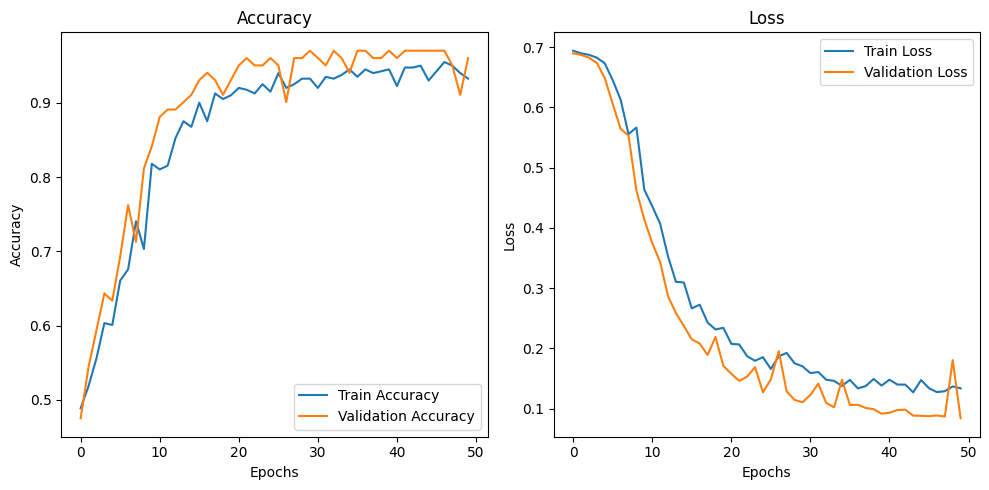

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(acc, label='Train Accuracy')
axes[0].plot(val_acc, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(loss, label='Train Loss')
axes[1].plot(val_loss, label='Validation Loss')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [21]:
pred_labels = (model.predict(X_test) > 0.5).astype(int)

acc = accuracy_score(y_test, pred_labels)
prec = precision_score(y_test, pred_labels)
f1 = f1_score(y_test, pred_labels)
recall = recall_score(y_test, pred_labels)
print(f'accuracy: {acc:.2f}, precision: {prec:.2f}, f1 score: {f1:.2f}, recall: {recall:.2f}')

4/4 [==============================] - 0s 2ms/step
accuracy: 0.96, precision: 0.95, f1 score: 0.96, recall: 0.98


In [22]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 17ms/step - loss: 0.0838 - accuracy: 0.9604


[0.08378253877162933, 0.9603960514068604]

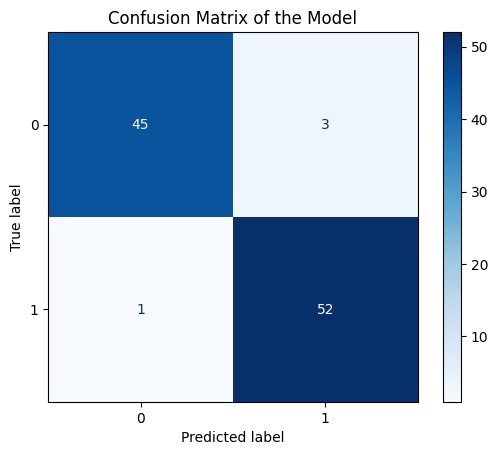

In [23]:
cm = confusion_matrix(y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Model')
plt.show()

In [24]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.95      0.98      0.96        53

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



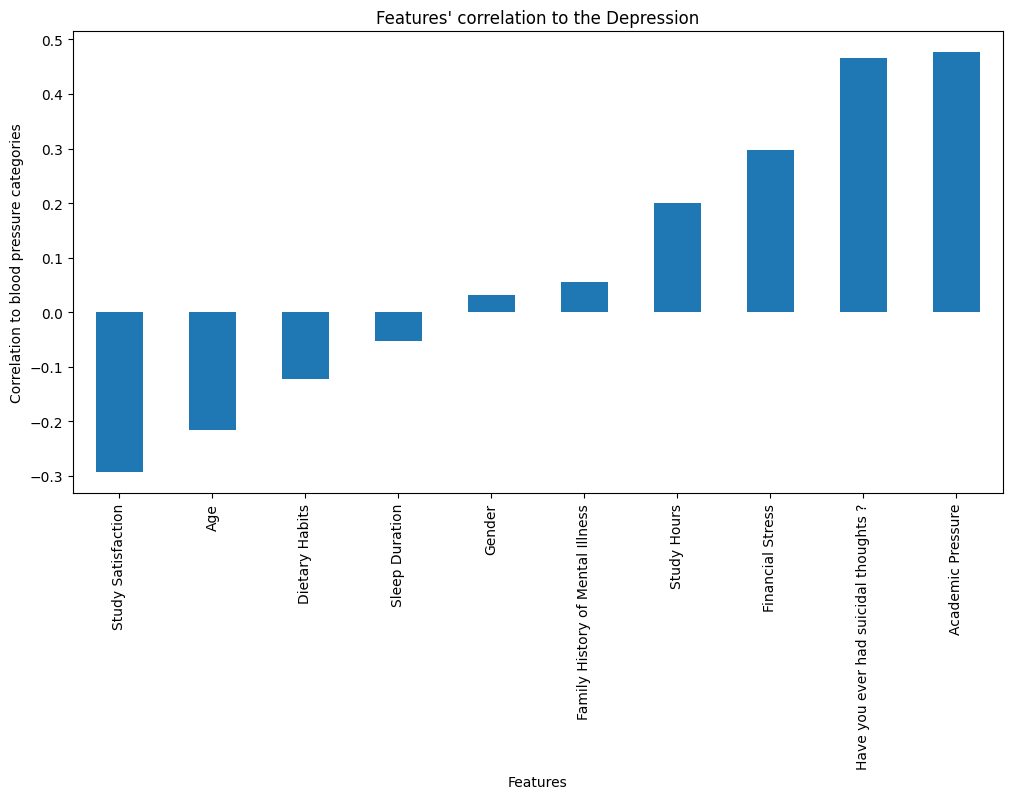

In [25]:
plt.figure(figsize=(12,6))

df.corr()['Depression'].sort_values(ascending = True)[:-1].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation to blood pressure categories')
plt.title('Features\' correlation to the Depression')
plt.show()